
Interactive network visualization using PYVIZ


In [ ]:
!pip install pyvis

 Import Network and pandas



In [2]:
from pyvis.network import Network
import pandas as pd

Instantiating the Network

All Networks must be instantiated using Network class instance
by defining some parameters , the height or width it shoud be , background color and font colors 

In [40]:
inter_net = Network(height='750px', width='100%', bgcolor='#000000', directed = False, font_color='white')

Setting the physics of the Network 

gravity
central_gravity
spring_length
spring_strength 
damping 
overlap. 

Force_atlas_2based is an impementation of Barnes_hut algorithm 

Barnes-Hut algorithm is a clever scheme for grouping together bodies that are sufficiently nearby, meaning , It recursively divides the set of bodies into groups by storing them in a quad-tree


purpose of using this algorithm is to speed up the n-body smulation in the O(nLogn) time complexity rather than brute force O(n2)

In [41]:
inter_net.force_atlas_2based(spring_length=300)

Reading the routers data 

In [42]:
internet_data = pd.read_csv('routerData.csv')

Splitting the data, the from node as Source and to node as Target
defining the edge data

In [43]:
sources = internet_data['Source']
targets = internet_data['Target']
edge_data = zip(sources, targets)

Add the nodes to the network 
Source Node , Destination node 


and edge or link between them of width .5


getting the neighbors inforamtion for every node on the network 
and storing it in a neighbor_map. 

we are using get_adj_list()
get_adj_list():
This method returns the user an adjacency list representation of the network. 
returns the dictionary mapping of Node ID to list of Node ID's it is connected to



In [44]:
for e in edge_data:
    src = str(e[0])
    dst = str(e[1])
   

    inter_net.add_node(src, src, title=src)
    inter_net.add_node(dst, dst, title=dst)
    inter_net.add_edge(src, dst,width=0.5)

neighbor_map = inter_net.get_adj_list()

Setting the node properties,that are displayed when we hover on it

Zoom in , Zoom out

Get the Router ID,Number of Connections and list of Neighors for each node

size of the node proportional to number of connections it has

color of the node proportional to its Node degree


storing it all in the html 



In [46]:
for node in inter_net.nodes:
    
  
    
    node['value'] = len(neighbor_map[node['id']])
    node['title'] += ' --> Router ID '  + '<br>' + 'No of Connections for ID#'+ node['id'] + '   -->  ' + str(len(neighbor_map[node['id']])) + '<br>'  + node['id'] + '  ' + 'Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['size'] = len(neighbor_map[node['id']])
    if node['size'] == 1:
      node['color'] = '	#DC143C'
    else:
      node['color'] = '	#FFFFFF'
inter_net.show('gameofthrones.html')

Displaying it using the Display library.

In [47]:
from IPython.core.display import display , HTML
display(HTML("gameofthrones.html"))

Second part , deals with Histogram plotting 

Histogram plot is for all the Router's data 



In [11]:
from networkx.readwrite import edgelist
import networkx as nx
import pandas as pd

gpd = nx.Graph()  ## create graph object 
full_data = pd.read_csv('routerData1.csv')
for i , elrow in full_data.iterrows(): ## add internet_data to graph
  gpd.add_edge(elrow[0], elrow[1])


Information on Number of Nodes and Edges we have for all the Router's data

In [12]:
print(nx.info(gpd))

Graph with 192244 nodes and 609066 edges


Calculating the Degree of the every node 

In [13]:
def calculate_degree(G, n = 0):
  fmdegree =[]
  fmNode = []
  
  for node in G.nodes():
      tempD = G.degree(node)
      if tempD >= n : 
        fmdegree.append(tempD),fmNode.append(node)
        
  return fmdegree,fmNode


callulating the Node Degree for every Node

In [14]:
gpdDegree , gpdNode = calculate_degree(gpd,0)


Maximum Degree for the network 

In [15]:
max(gpdDegree)

1071

Minimum Degree of the Network

In [16]:
min(gpdDegree)

1

Sample Node Degree Details 

In [17]:
data= {'Node' : gpdNode, 'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head(5)

,Node,Degree
0,0,94
1,1,66
2,111,345
3,219,38
4,337,60


Sorting by the Degree Values 

In [18]:
df_NodeDegree.sort_values(by=['Degree'])

,Node,Degree
192243,192191,1
153767,183692,1
153766,183690,1
33419,112777,1
153765,171339,1
...,...,...
962,868,742
178,6,780
963,1306,802
257,8441,841


In [19]:
import matplotlib.pyplot as plt
%matplotlib  inline

In [20]:
val = list(df_NodeDegree['Degree'])
val.sort()


Plotting the Histogram for Node Degree Distribution 

X Axis -->  Degree of Nodes 
Y Axis -->  Number of Nodes 

<Figure size 432x288 with 0 Axes>

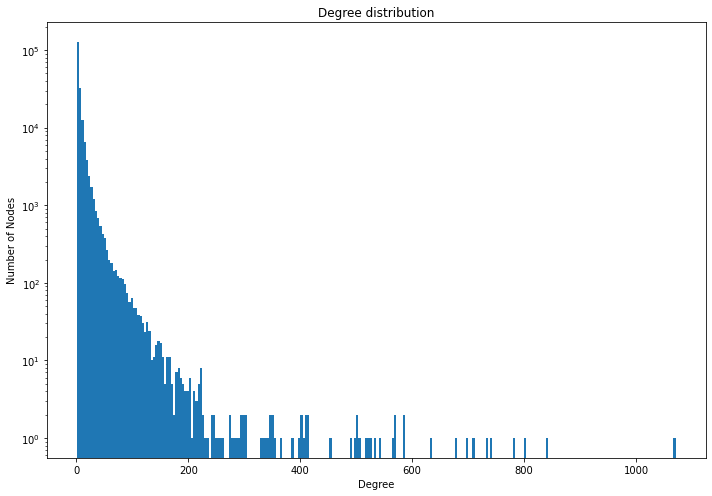

In [33]:
plt.figure()

fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)
axs.hist(val, bins=len(set(val)))
axs.set_yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree distribution')
plt.savefig('Degree_Distriution.png')
plt.show()
plt.close()

Histogram Interpretation  -->  The above hsotogram shows the Node degree distribution for 1922244 Nodes 

for example : more than hundred thousand nodes have Node Degree 1 (have only one neighbbor) 

Most of the nodes in the network fall in the catogory of having Node degree between 1 and 200 

Few of the nodes(below hundreds) have Degrees between 200 and 600 

Very few have node degrees between 600 and 800

and there are just few (10 or below 10 have ) Node degree more than 1000.

This Analysis is very proportional to the results we obtained , from below , we can see that the red nodes from the network are much in number almost equal to all the other nodes put together  
and our max degree is 1071 and from the graph its close to 1071





In [39]:
max(gpdDegree)

1071